# Monte Carlo On-Policy Strategy

**Algorithm**
\
**Input** $\epsilon$ random action probabilites, $\gamma$ discount factor
\
$\pi \leftarrow$ e-greedy policy w.r.t $Q(s, a)$
\
**Initialize** $Q(s, a)$ arbitrarily with $Q$(terminal,) = 0
\
$G(s, a) \leftarrow [\;]$
\
**for** episode $\in 1..N$ do
\
$\;\;\;\;\;\;$ Generate episode following $\pi: S_{0}, A_{0}, R{1}, ...., S_{T-1}, A_{T-1}, R_{T}$
\
$\;\;\;\;\;\;$ $G \leftarrow 0$
\
$\;\;\;\;\;\;$ **for** $t \in T - 1..0$ do
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $G \leftarrow R_{t+1} + \gamma G$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ Append $G$ to $G(S_{t}, A_{t})$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $Q(s, a) \leftarrow(G(S_{t}, A_{t}))$
\
$\;\;\;\;\;\;$ **end for**
\
**end for**
\
\
**Output:** Neat optimal policy $\pi$ and action values $Q(s, a)$

In [13]:
# import 
import gym 
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_action_probs, plot_policy, test_agent, plot_action_values

#### Environment set up

In [3]:
env = Maze()
env.reset()

(0, 0)

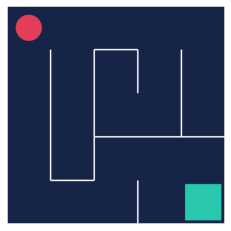

In [9]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

env.close()

#### Action spaces and Observation spaces

In [5]:
print(f'Number of action space: {env.action_space.n}')
print(f'Observation space: {env.observation_space.nvec}')

Number of action space: 4
Observation space: [5 5]


#### Define $Q(s, a)$

In [12]:
# create q(s, a) table
q = np.zeros(shape=(5, 5, 4))

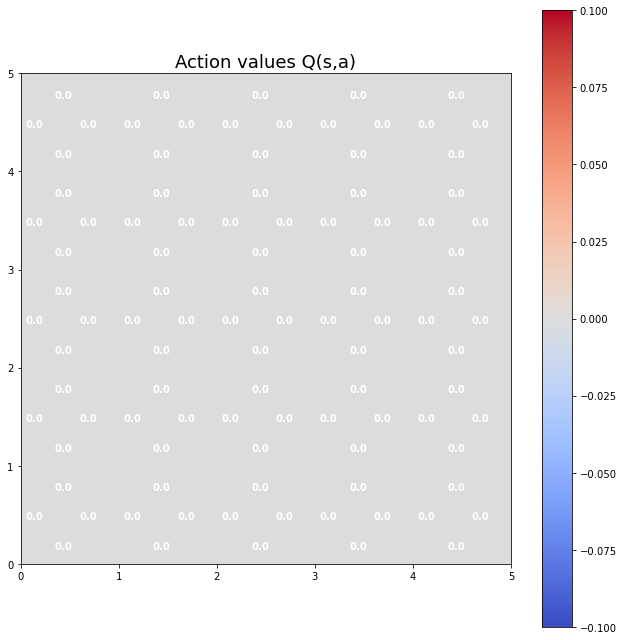

In [15]:
# plot action value
plot_action_values(q)

In [7]:
type(env.observation_space.nvec)

numpy.ndarray

#### Define Policy $\pi(s)$

In [16]:
# create policy
def policy(state, epsilon=.2):
    # randomly choose an action if 
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = q[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [21]:
# test policy
for i in range(2):
    for j in range(2):
        print(f'Action take in state {i, j}: {policy((i,j), epsilon=.2)}')

Action take in state (0, 0): 1
Action take in state (0, 1): 0
Action take in state (1, 0): 1
Action take in state (1, 1): 1


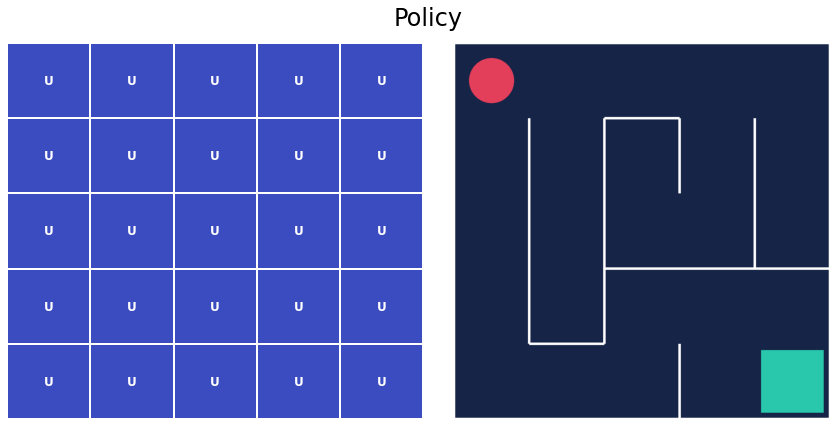

In [23]:
# plot policy value
plot_policy(q, frame)

### Implement the algorithm

In [ ]:
# monte carlo on policy
def on_policy_control(policy, action_probs, episodes, epsilon=.2, gamma=.9):
    """Monte carlo on policy control task

    Args:
        policy (nparray): _description_
        action_probs (_type_): table of action probabilities
        episodes (int): Episode Agent interact with the environment
        epsilon (float, optional): Probability of random action explore the environment. Defaults to .2.
        gamma (float, optional): Reward discount rate. Defaults to .9.
    """
    # table of action take in given state
    qsa_return = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        state_transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            state_transitions.append([state, action, reward])
            
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(state_transitions):
            G = reward_t + gamma * G
            
            if not(state_t, action_t) in qsa_return:
                qsa_return[(state_t, action_t)] = []
                
            qsa_return[(state_t, action_t)].append(G)
            qsa_return[state_t][action_t] = np.mean(qsa_return[(state_t, action_t)])

In [34]:
on_policy_control(policy, q, episodes=10000,)

KeyboardInterrupt: 

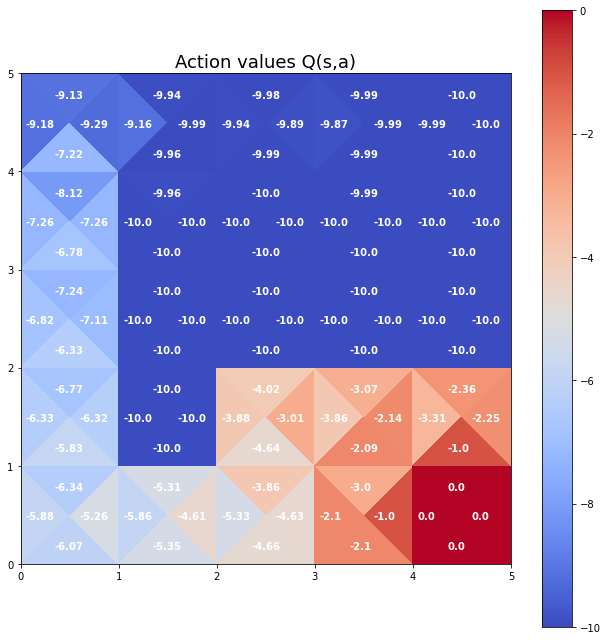

In [27]:
plot_action_values(q)

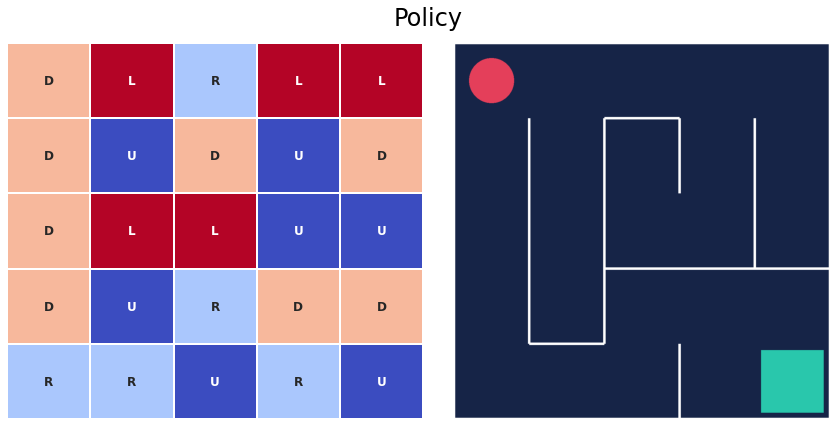

In [28]:
plot_policy(q, frame)

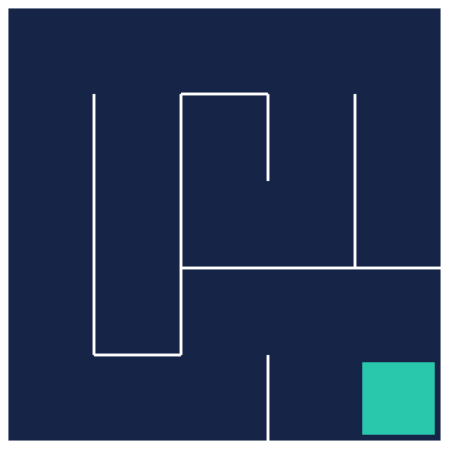

In [29]:
test_agent(env, policy, episodes=1)

### Monte carlo Constant alpha 

In [30]:
def on_policy_constant_alpha(policy, action_vals, episodes, epsilon=.2, gamma=.2, alpha=.2):
    for epsiode in range(1, episodes+1):
        state = env.reset()
        done = False
        state_transition = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            state_transition.append([next_state, action, reward])
            
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(state_transition):
            G = reward_t + gamma * G
            qsa = action_vals[state_t][action_t]
            action_vals[state_t][action_t] += alpha * (G-qsa)

In [ ]:
q = np.zeros((5, 5, 4))
on_policy_constant_alpha(policy, q, episodes=1000)

In [ ]:
plot_action_values(q)